# Tests verification chain with polarization only

In [51]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import healpy as hp
import astropy.io.fits as fits
from matplotlib.colors import LogNorm, SymLogNorm

In [52]:
nside = 64
lmax = nside*2
lmin = 2

nstokes = 2
number_correlations = 4

jump_iter = 1
n_iter = 8

In [53]:
noise_level = 10**(-7)

In [54]:
# file_ver = 'PolarClassicalGibbsMapv1a' # Map realization ; only polar
# file_ver = 'PolarClassicalGibbsMapv1b' # Map realization ; only polar ; short chain (10 samples)
# file_ver = 'PolarClassicalGibbsMapv1c' # Map realization ; only polar ; short chain (10 samples) ; initial guess = 0
# file_ver = 'PolarClassicalGibbsMapv1d' # Map realization ; only polar ; short chain (10 samples) ; initial guess = 0 ; unit_variance_maps = 1
# file_ver = 'PolarClassicalGibbsMapv1e' # Map realization ; only polar ; short chain (10 samples) 
#### ABOVE EVERYTHING IS WRONG !!!!
file_ver = 'PolarClassicalGibbsMapv2a' # Map realization ; only polar ; short chain (10 samples) 
file_ver = 'PolarClassicalGibbsMapv2b' # Map realization ; only polar ; short chain (10 samples) ; test CG fluct

mask_name = 'fullsky'

dir_path = '/Users/mag/Documents/PHD1Y/Space_Work/Pixel_non_P2D/data_files/run_validation_classical_sampling/run_validation_full_chain/'

path_map_CMB = dir_path + "Map_ver{}_only_CMB_{}.fits".format(file_ver, lmax)
path_map_wn = dir_path + "Map_ver{}_only_wn_{}.fits".format(file_ver, lmax)
path_map_total = dir_path + "Map_total_{}_CMB_plus_white_noise_{}.fits".format(file_ver, lmax)


outname_camb = dir_path + 'CAMB_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)

outname_all_fluct = dir_path + 'All_map_fluct_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)
outname_all_WF = dir_path + 'All_map_WF_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)

outname_all_analytical_fluct = dir_path + 'All_analytical_map_fluct_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)
outname_all_analytical_WF = dir_path + 'All_analytical_map_WF_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)

outname_map = dir_path + 'Map_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)
outname_c_ell = dir_path + 'Cell_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)

outname_true_variance_fluct = dir_path + 'Variance_fluctuation_{}_ver{}_nside{:3d}_{}.npy'.format(mask_name, file_ver, nside, lmax)

map_total = hp.read_map(path_map_total, field=None)
CMB_map_input = hp.read_map(path_map_CMB, field=None)
map_wn_2 = hp.read_map(path_map_wn, field=None)

c_ells_total = hp.anafast(map_total, lmax=lmax, iter=n_iter)
c_ells_noise_2 = np.zeros((number_correlations, lmax+1))
c_ells_noise_2[:3,2:] = noise_level

c_ells_theory = np.zeros_like(c_ells_total)
c_ells_theory[:4,:] = np.load(outname_camb)

all_samples_map = np.load(outname_map)
all_samples_cells = np.load(outname_c_ell)


all_map_fluct = np.load(outname_all_fluct)
all_map_WF = np.load(outname_all_WF)
all_analytical_maps_fluct = np.load(outname_all_analytical_fluct)
all_analytical_maps_WF = np.load(outname_all_analytical_WF)

true_variance_fluct = np.load(outname_true_variance_fluct)

ell_arange = np.arange(all_samples_cells.shape[2])

In [55]:
number_iterations = all_samples_cells.shape[0]

In [56]:
for ell in range(lmax+1):
    hist, bin_edges = np.histogram(all_samples_cells[:,:,ell])


In [57]:
number_Stokes = 0
ell_number = 50

hist, bin_edges = np.histogram(all_samples_cells[:,number_Stokes,ell_number], bins=int(number_iterations))

In [58]:
number_correl_to_plot = int(np.ceil(nstokes**2/2) + np.floor(nstokes/2))

if nstokes == 3:
    number_subplots_convention = 421
    figsize = (10,10)
    figsize_big = (12,12)
    position_legend = int(number_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)
elif nstokes == 2:
    number_subplots_convention = 131
    figsize = (14,6)
    figsize_big = figsize
    position_legend = number_correl_to_plot-1
    bbox_to_anchor=(1, 1)
else:
    number_subplots_convention = 111
    figsize = (10,10)
    figsize_big = (10,10)
    position_legend = int(number_correl_to_plot/2)-1
    bbox_to_anchor=(2.2, 1)


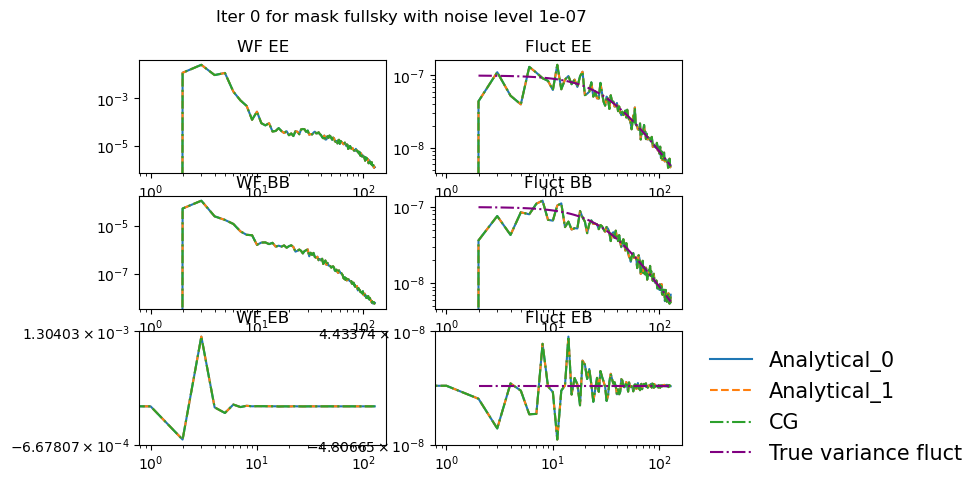

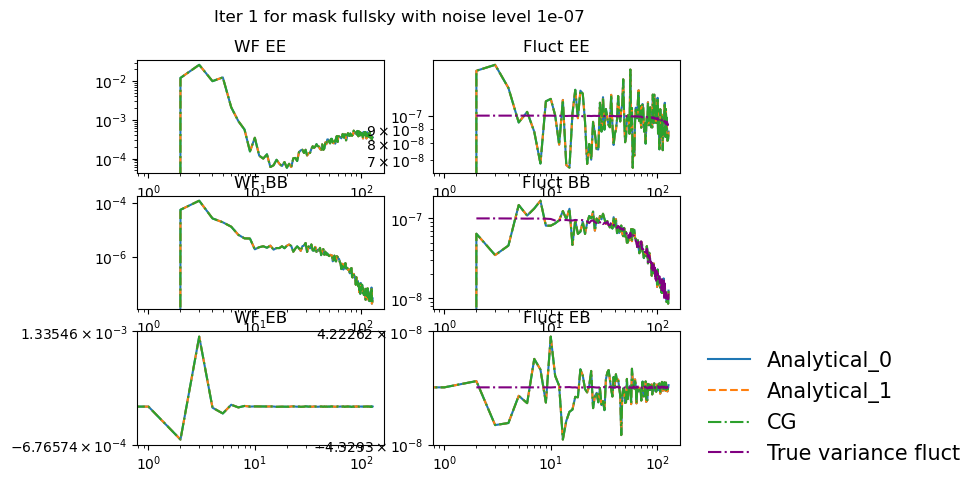

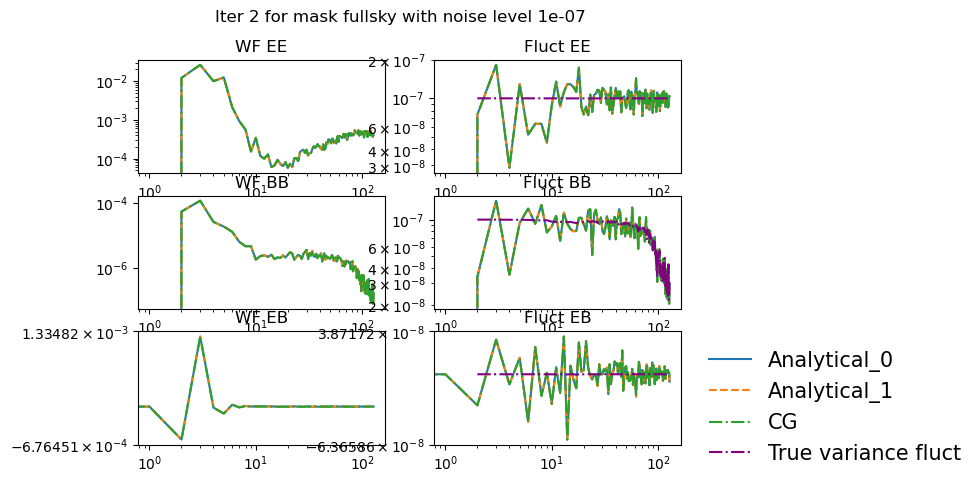

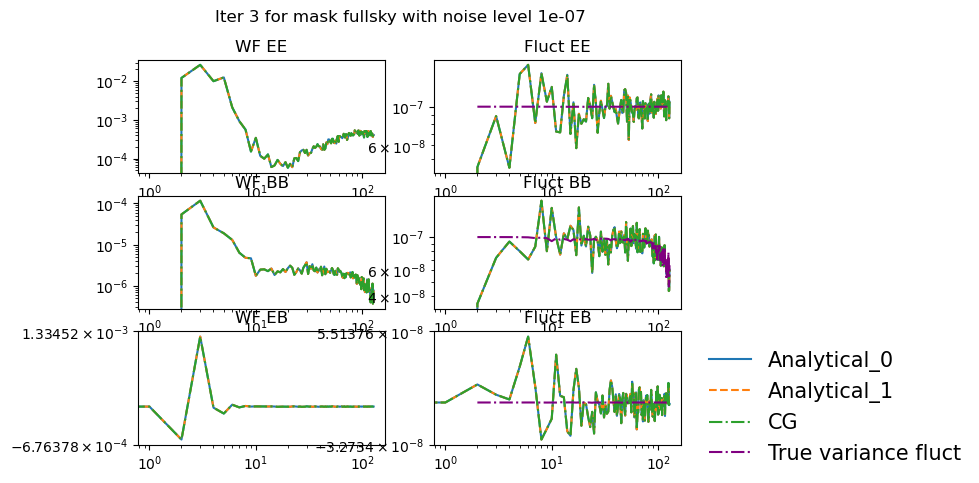

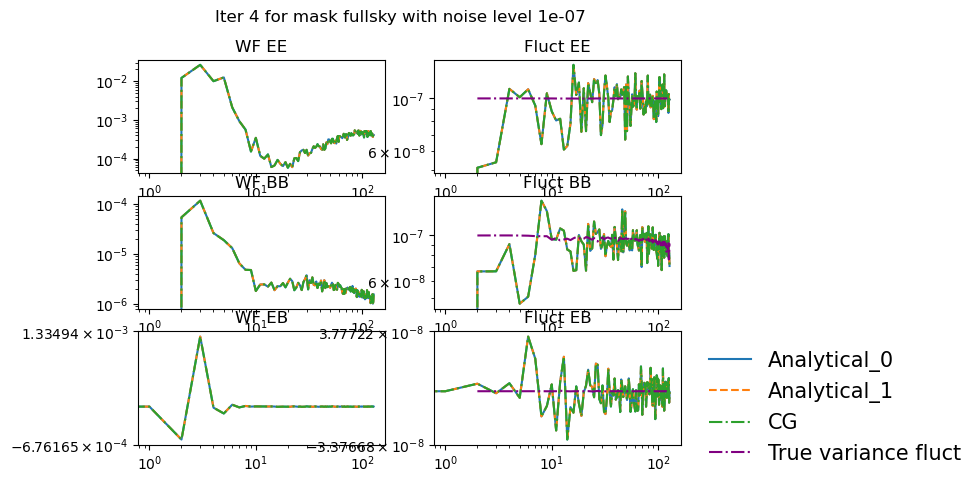

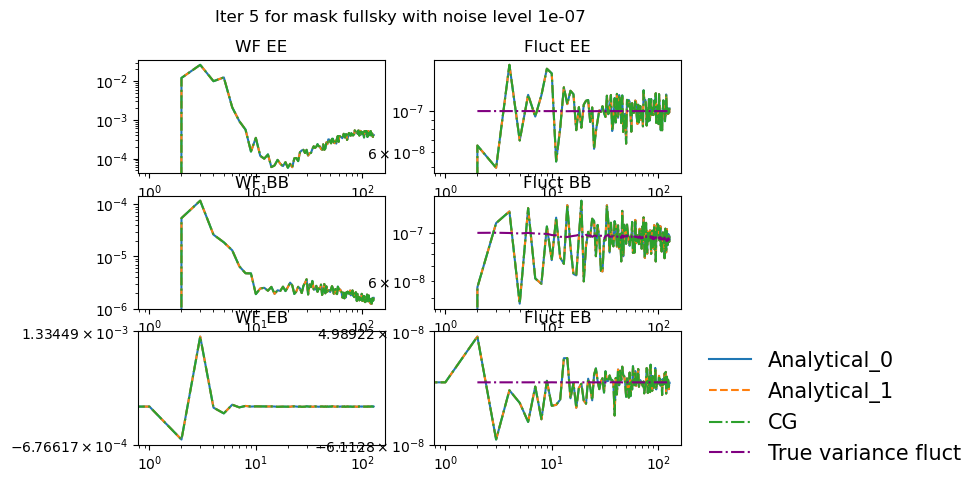

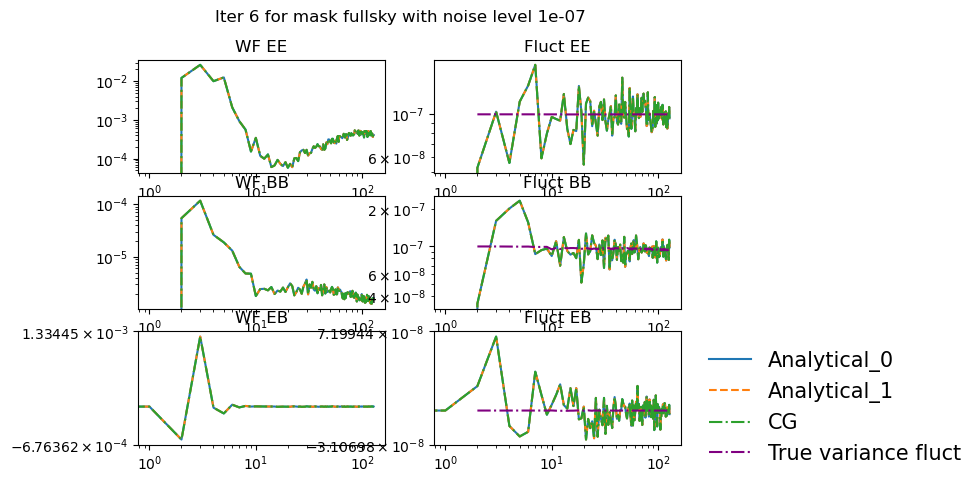

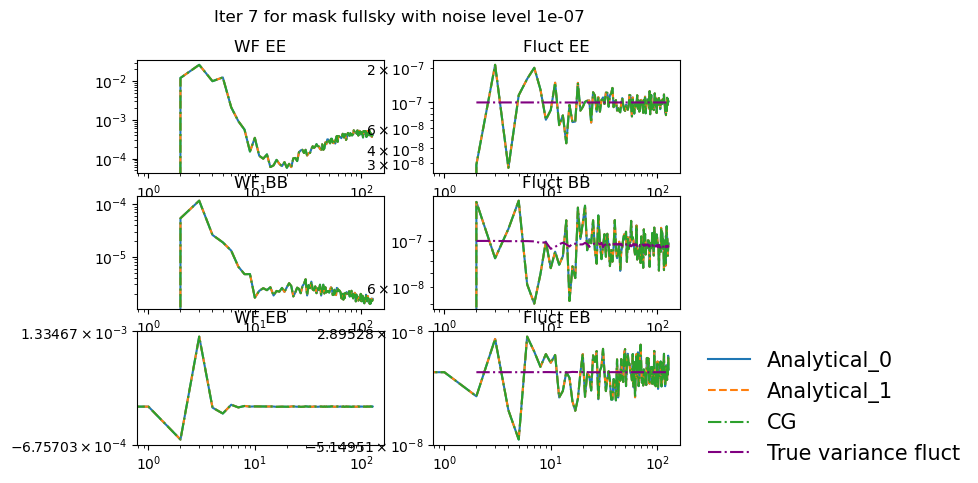

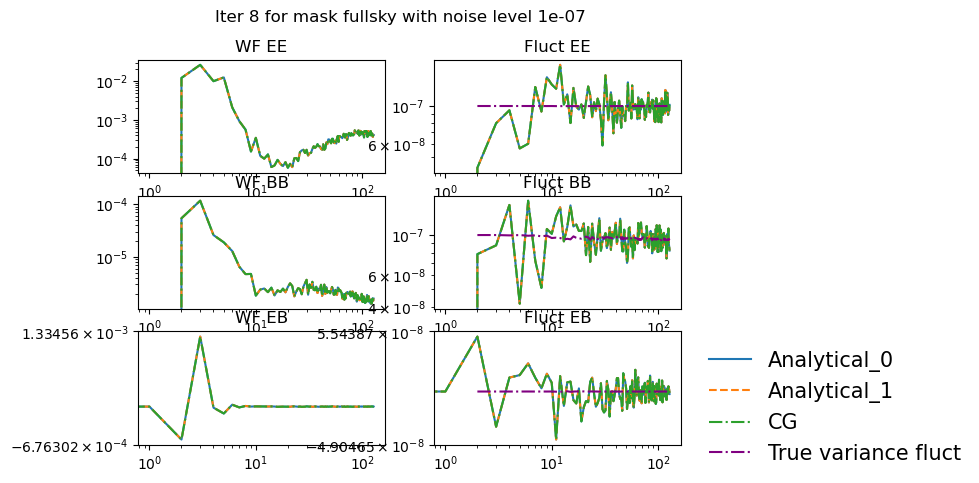

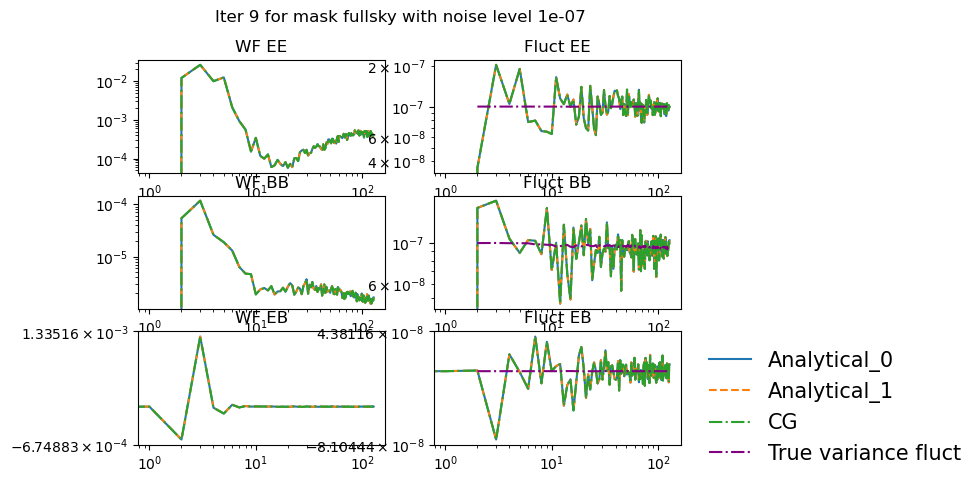

In [59]:
# list_correl = ['TT', 'EE', 'BB', 'TE', 'EB', 'TB']
list_correl = ['EE', 'BB', 'EB']
indices_polar = np.array([1,2,4])

map_zeros = np.zeros(12*nside**2)
for i in np.arange(0,number_iterations-1,jump_iter):
    maps_iter = np.vstack([np.zeros(12*nside**2), all_samples_map[i,...]])
    c_ell_iter = all_samples_cells[i,...]

    plt.figure(figsize=(7,5))
    # plt.suptitle("Iter {} for mask {} with noise level {}".format(i, mask_name, noise_level), y=0.91)
    plt.suptitle("Iter {} for mask {} with noise level {}".format(i, mask_name, noise_level))
    
    
    # c_ells_output = hp.anafast(maps_iter, lmax=lmax, iter=n_iter)[indices_polar]
    c_ells_analytical_fluct_0 = hp.anafast(np.vstack([map_zeros,all_analytical_maps_fluct[0,i,...]]), lmax=lmax, iter=n_iter)[indices_polar]
    c_ells_analytical_fluct_1 = hp.anafast(np.vstack([map_zeros,all_analytical_maps_fluct[1,i,...]]), lmax=lmax, iter=n_iter)[indices_polar]

    c_ells_analytical_WF_0 = hp.anafast(np.vstack([map_zeros,all_analytical_maps_WF[0,i,...]]), lmax=lmax, iter=n_iter)[indices_polar]
    c_ells_analytical_WF_1 = hp.anafast(np.vstack([map_zeros,all_analytical_maps_WF[1,i,...]]), lmax=lmax, iter=n_iter)[indices_polar]

    c_ells_CG_fluct_0 = hp.anafast(np.vstack([map_zeros,all_map_fluct[i,...]]), lmax=lmax, iter=n_iter)[indices_polar]
    c_ells_CG_WF_0 = hp.anafast(np.vstack([map_zeros,all_map_WF[i,...]]), lmax=lmax, iter=n_iter)[indices_polar]
    
    for j in range(number_correl_to_plot):
        ax = plt.subplot(321+ 2*j)
        plt.title('WF '+list_correl[j])

        # plt.plot(ell_arange, c_ells_total.T[:,indices_polar[j]], label='Input')
        plt.plot(ell_arange, c_ells_analytical_WF_0[j], label='Analytical_0')
        plt.plot(ell_arange, c_ells_analytical_WF_1[j], '--', label='Analytical_1')
        
        plt.plot(ell_arange, c_ells_CG_WF_0[j], '-.', label='CG')
        
        if nstokes == 3 and j < number_correl_to_plot-2:
            plt.xticks(color='w')

        if j <= nstokes-1:
            plt.loglog()
            # plt.ylim(ymin=noise_level/10.)
        else:
            plt.xscale('log')
            plt.yscale('symlog')

        ax = plt.subplot(321+2*j+1)
        plt.title('Fluct '+list_correl[j])

        # plt.plot(ell_arange, c_ells_total.T[:,indices_polar[j]], label='Input')
        plt.plot(ell_arange, c_ells_analytical_fluct_0[j], label='Analytical_0')
        plt.plot(ell_arange, c_ells_analytical_fluct_1[j], '--', label='Analytical_1')

        plt.plot(ell_arange, c_ells_CG_fluct_0[j], '-.', label='CG')

        plt.plot(ell_arange[lmin:], true_variance_fluct[i+1,j], '-.', color="purple", label='True variance fluct')

        if nstokes == 3 and j < number_correl_to_plot-2:
            plt.xticks(color='w')

        if j <= nstokes-1:
            plt.loglog()
            # plt.ylim(ymin=noise_level/10.)
        else:
            plt.xscale('log')
            plt.yscale('symlog')

        # plt.legend()
        if j == position_legend:
            plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", prop={'size': 15}, frameon=False)


plt.show()

(array([2., 0., 0., 0., 0., 0., 0., 2., 2., 1., 4.]),
 array([3.92156863e-08, 3.21624661e-05, 6.42857164e-05, 9.64089668e-05,
        1.28532217e-04, 1.60655468e-04, 1.92778718e-04, 2.24901968e-04,
        2.57025219e-04, 2.89148469e-04, 3.21271719e-04, 3.53394970e-04]),
 <BarContainer object of 11 artists>)

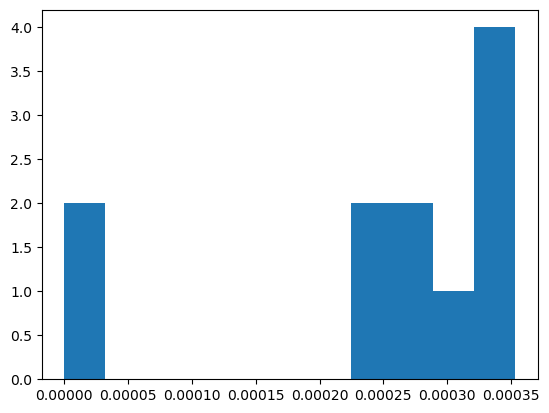

In [60]:
plt.hist(bin_edges[:-1], bin_edges, weights=hist)
